In [ ]:
digitsデータ(手書き文字の分類データ)を読み込んでください。
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
iris同様、決定木とランダムフォレストのモデルを用いて推論してください。
正解率(accuracy)を算出してください。

In [8]:
# digitsデータ(手書き文字の分類データ)の読み込み
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [9]:
# 基礎集計からこのデータの説明をしてください。
import pandas as pd
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [42]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
df['category'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,category
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [12]:
df.shape

(1797, 65)

In [13]:
# train, testに分割
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
train_test_split(X, y, test_size=0.3, random_state=5)

[array([[ 0.,  3., 10., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ..., 15.,  5.,  0.],
        [ 0.,  0., 10., ...,  9.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0., 10., ...,  1.,  0.,  0.],
        [ 0.,  0., 10., ..., 10.,  0.,  0.]]),
 array([[ 0.,  0., 11., ...,  0.,  0.,  0.],
        [ 0.,  0.,  5., ..., 16., 12.,  1.],
        [ 0.,  6., 13., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 15.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  2., 16., ...,  5.,  0.,  0.]]),
 array([5, 2, 3, ..., 6, 8, 3]),
 array([5, 2, 5, 5, 5, 3, 2, 2, 3, 5, 9, 8, 7, 2, 1, 1, 5, 7, 0, 4, 5, 9,
        0, 2, 1, 3, 4, 7, 5, 2, 1, 1, 2, 9, 8, 1, 4, 5, 4, 9, 5, 5, 6, 0,
        1, 7, 2, 9, 7, 7, 3, 9, 5, 1, 6, 6, 7, 7, 8, 1, 6, 1, 3, 6, 1, 3,
        2, 6, 8, 1, 4, 7, 1, 6, 0, 0, 5, 1, 3, 5, 1, 6, 4, 0, 4, 7, 5, 7,
        8, 3, 7, 8, 5, 1, 1, 7, 5, 9, 7, 9, 3, 0, 7, 8, 7, 4, 8, 3, 2, 8,
        5, 2, 7, 4, 4, 8, 9

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((1797, 64), (1257, 64), (540, 64), (1797,), (1257,), (540,))

In [15]:
# 決定木のインスタンス化
from sklearn.tree import DecisionTreeClassifier
model_decisiontree = DecisionTreeClassifier(random_state=3)

# 決定木の予測モデルの学習
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [16]:
# 決定木の予測モデルの評価(正解率：accuracyを算出)
y_pred_decisiontree = model_decisiontree.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_decisiontree)

0.8537037037037037

In [17]:
# scoreﾒｿｯﾄﾞで正解率を再確認
model_decisiontree.score(X_test, y_test)

0.8537037037037037

In [18]:
 # ランダムフォレストのインスタンス化
 from sklearn.ensemble import RandomForestClassifier
 model_randomforest = RandomForestClassifier(random_state=3)

 # ランダムフォレストの予測モデルの学習
 model_randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=3)

In [20]:
# ランダムフォレストの予測モデルの評価(正解率：accuracyを算出)
y_pred_randomforest = model_randomforest.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_randomforest)

0.975925925925926

In [21]:
# scoreﾒｿｯﾄﾞで正解率を再確認
model_randomforest.score(X_test, y_test)

0.975925925925926

In [312]:
# 予測　【補足】予測モデルで何を予測できるのか試しました。
import numpy as np
X_real = np.array([
    [10, 1000, 1100, 1100, 1100, 1100, 900, 10, 10, 1100, 300, 10, 10, 10, 10, 10, 10, 1100, 10, 10, 10, 10, 10, 10, 10, 1100, 1100, 1100, 1100, 1100, 1000, 10, 10, 1100, 300, 10, 10, 300, 1100, 10, 10, 1100, 10, 10, 10, 10, 1100, 10, 10, 1100, 300, 10, 10, 300, 1100, 10, 10, 1000, 1100, 1100, 1100, 1100, 1000, 10],
    [0, 0, 0, 0, 0, 0, 0, 1.6, 5.8, 0.92, 3.2, 1011,13, 500, 500, 500, 118, 110, 100, 100, 100, 100, 100, 8, 8, 100, 1000, 100, 100, 100, 100, 100, 700, 900, 1000, 800, 400, 400, 1000, 900, 1000, 10, 1000, 500, 500, 0, 0, 0, 0, 100, 1011,100, 100, 100, 100, 100, 1, 1, 1, 1, 1,  1, 1, 1],
    [4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560,14, 4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560,14, 4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560,14, 4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560,14, 4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560]])
model_decisiontree.predict(X_real)

array([8, 7, 4])

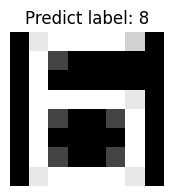

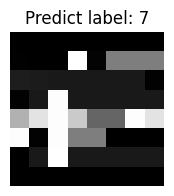

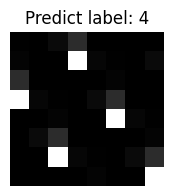

In [313]:
# 予測の説明データの可視化 ※Chat GPTでコードを確認しました。

import matplotlib.pyplot as plt
import numpy as np

# 予測
y_pred = model_decisiontree.predict(X_real)

# データを可視化（1サンプルずつ）
for i, (image, label) in enumerate(zip(X_real, y_pred)):
    plt.figure(figsize=(2, 2))
    plt.imshow(image.reshape(8, 8), cmap='gray', interpolation='none')
    plt.title(f"Predict label: {label}")
    plt.axis('off')
    plt.show()

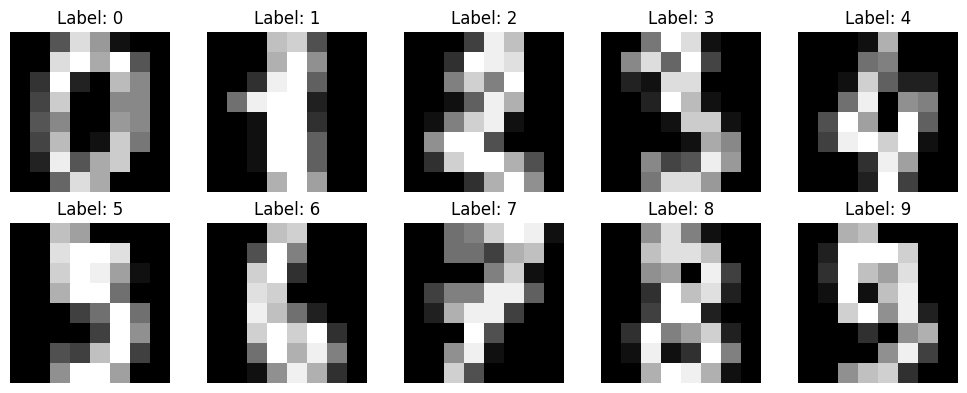

In [22]:
# 何を書いている文字データなのか、chat GPTに聞きました。

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# データ読み込み
digits = load_digits()

# 画像を10枚表示
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2行5列のサブプロット
    plt.imshow(digits.images[i], cmap='gray')  # 画像表示（グレースケール）
    plt.title(f'Label: {digits.target[i]}')    # 正解ラベルをタイトルに
    plt.axis('off')                            # 枠線や目盛りを非表示に

plt.tight_layout()
plt.show()